<a href="https://colab.research.google.com/github/Nenavath-chandu/Water-Energy-Nexus-Study-for-Agricultural-Sector-2013-2023-/blob/main/WAter_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Water–Energy Nexus Study for Agricultural Sector (2013–2023)**



**States**: Punjab & Haryana

- Groundwater Monitoring (CGWB-style): 300 wells × 11 years  
- Agricultural Irrigation, Crop & Carbon Emissions: 12,000+ records


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


In [9]:

gwl = pd.read_csv("groundwater_monitoring_15districts_2013_2023.csv")
agri = pd.read_csv("agri_irrigation_emissions_2016_2023.csv")

gwl.head()


,Well_ID,State,District,Latitude,Longitude,Year,Month,GWL_m
0,LUD_000,Punjab,Ludhiana,29.12362,77.376786,2013,1,8.32
1,LUD_000,Punjab,Ludhiana,29.12362,77.376786,2013,2,8.76
2,LUD_000,Punjab,Ludhiana,29.12362,77.376786,2013,3,7.88
3,LUD_000,Punjab,Ludhiana,29.12362,77.376786,2013,4,9.38
4,LUD_000,Punjab,Ludhiana,29.12362,77.376786,2013,5,10.29


In [10]:
agri.head()

,Year,State,District,Crop,Area_ha,Irrigation_Days,Pump_Type,Water_L_per_ha_day,Efficiency,Total_Water_Used_L,Carbon_Emissions_kg,Solar_Used
0,2016,Haryana,Panipat,Wheat,11,164,Diesel,5000,1.0,9020000.0,24173.60,0
1,2023,Haryana,Rohtak,Wheat,37,115,Diesel,5000,1.0,21275000.0,57017.00,0
2,2020,Punjab,Bathinda,Cotton,25,62,Diesel,7000,1.0,10850000.0,29078.00,0
3,2017,Punjab,Ludhiana,Sugarcane,41,139,Diesel,18000,1.0,102582000.0,274919.76,0
4,2017,Haryana,Rohtak,Sugarcane,19,133,Electric,18000,0.8,36388800.0,54583.20,0


Groundwater Depletion Trends

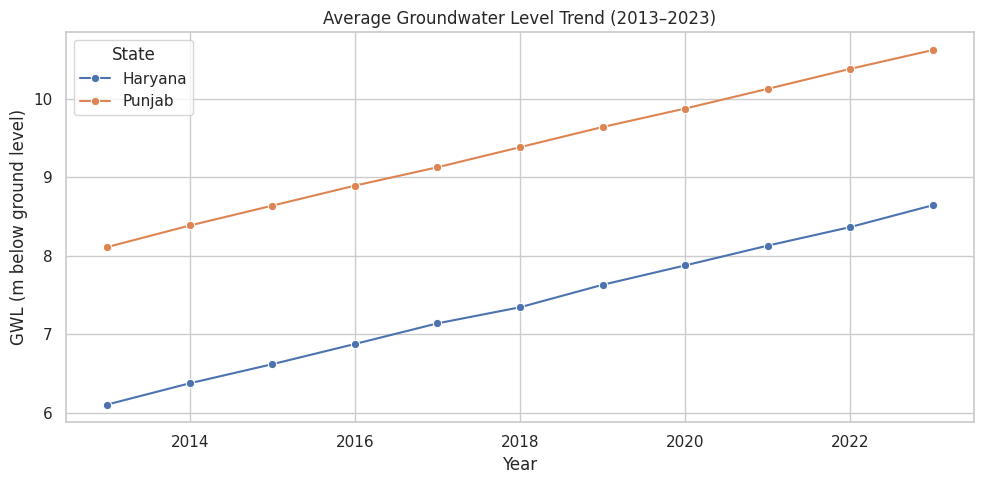

In [11]:
# Average groundwater level by year & state
gwl_avg = gwl.groupby(["Year", "State"])["GWL_m"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=gwl_avg, x="Year", y="GWL_m", hue="State", marker="o")
plt.title("Average Groundwater Level Trend (2013–2023)")
plt.ylabel("GWL (m below ground level)")
plt.grid(True)
plt.tight_layout()
plt.show()


Crop Distribution & Pump Type

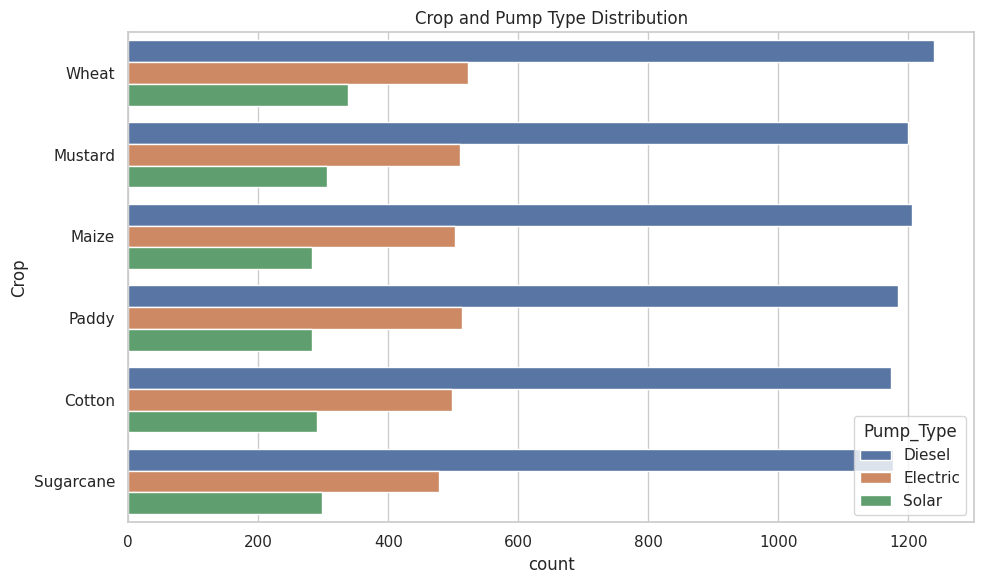

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=agri, y="Crop", hue="Pump_Type", order=agri["Crop"].value_counts().index)
plt.title("Crop and Pump Type Distribution")
plt.tight_layout()
plt.show()


Estimate Water Usage by Pump Type

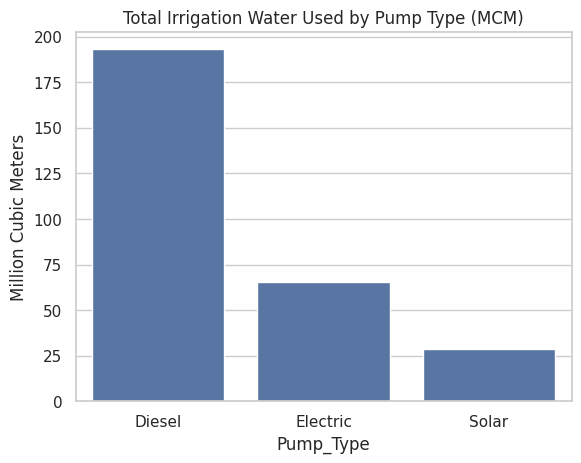

In [13]:
# Total water used by pump type
water_pump = agri.groupby("Pump_Type")["Total_Water_Used_L"].sum().reset_index()
water_pump["Total_Water_Used_MCM"] = water_pump["Total_Water_Used_L"] / 1e9  # million cubic meters

sns.barplot(data=water_pump, x="Pump_Type", y="Total_Water_Used_MCM")
plt.title("Total Irrigation Water Used by Pump Type (MCM)")
plt.ylabel("Million Cubic Meters")
plt.show()


Carbon Emission Reduction Estimate

/tmp/ipython-input-14-1398310379.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=carbon, x="Pump_Type", y="Carbon_Tonnes", palette="coolwarm")


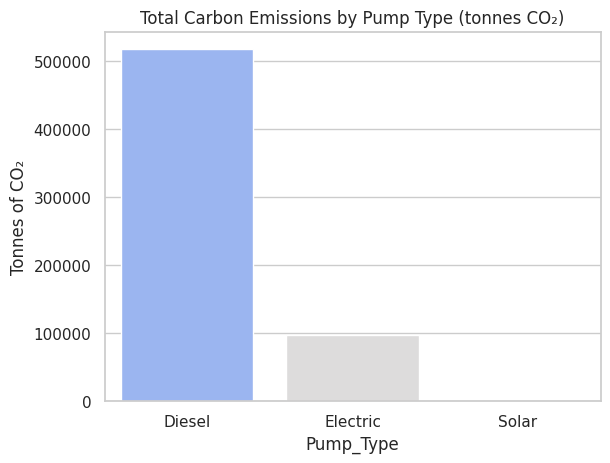

In [14]:
# Total carbon emissions per pump type
carbon = agri.groupby("Pump_Type")["Carbon_Emissions_kg"].sum().reset_index()
carbon["Carbon_Tonnes"] = carbon["Carbon_Emissions_kg"] / 1000

sns.barplot(data=carbon, x="Pump_Type", y="Carbon_Tonnes", palette="coolwarm")
plt.title("Total Carbon Emissions by Pump Type (tonnes CO₂)")
plt.ylabel("Tonnes of CO₂")
plt.show()


Solar Adoption & Impact



In [15]:
# % Solar vs Diesel
solar_stats = agri.groupby("Pump_Type").agg(
    Count=("Solar_Used", "count"),
    Solar=("Solar_Used", "sum")
).reset_index()
solar_stats["Percent_Solar"] = (solar_stats["Solar"] / solar_stats["Count"]) * 100

solar_stats


,Pump_Type,Count,Solar,Percent_Solar
0,Diesel,7178,0,0.0
1,Electric,3024,0,0.0
2,Solar,1798,1798,100.0


Water & Carbon Savings with 50% Solar Adoption

In [16]:
# Simulate 50% solar conversion scenario
baseline = agri.copy()
future = baseline.copy()
future["Adjusted_Emissions"] = np.where(
    future["Pump_Type"] == "Diesel",
    future["Carbon_Emissions_kg"] * 0.5,
    future["Carbon_Emissions_kg"]
)
future["Adjusted_Water"] = np.where(
    future["Pump_Type"] == "Diesel",
    future["Total_Water_Used_L"] * 0.6,  # solar uses 40% less
    future["Total_Water_Used_L"]
)

# Calculate savings
saved_carbon_kg = baseline["Carbon_Emissions_kg"].sum() - future["Adjusted_Emissions"].sum()
saved_water_mcm = (baseline["Total_Water_Used_L"].sum() - future["Adjusted_Water"].sum()) / 1e9

print(f"Estimated CO₂ Saved: {saved_carbon_kg/1000:.2f} tonnes")
print(f"Estimated Water Saved: {saved_water_mcm:.2f} MCM")


Estimated CO₂ Saved: 258691.97 tonnes
Estimated Water Saved: 77.22 MCM


#  Insights:

- Groundwater depletion is steady in both Punjab and Haryana, especially post-2017
- Diesel pumps dominate irrigation and are associated with highest carbon and water usage
- Solar pumps show significant efficiency, but adoption is still < 20%
- Paddy accounts for majority of water consumption

---

####  Recommendations

1. Target high-depletion districts for solar pump subsidy programs
2. Combine solar pump deployment with **minimum support price (MSP) incentives** for low-water crops (e.g., maize, mustard)
3. Promote **micro-irrigation** alongside solar (drip/sprinklers)
4. Real-time groundwater monitoring at district/block level for adaptive decision-making

---
